In [7]:
import sys
sys.path.append("OpticalFlowToolkit/")
import lib.flowlib as optical_flow_lib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

%run tools.py

In [5]:
flow = open_flow("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-gt.flo")
it0 = open_image("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-img0.ppm")
it1 = open_image("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-img1.ppm")
it0_expected = apply_flow_reverse(it1, flow)

norm, nonzeros, nonzeros_after = new_loss(it0, it1, flow)
print calculate_loss(it0, it0_expected)
print norm
cv2.norm(it0[nonzeros], it1[nonzeros], cv2.NORM_L2)

Reading 384 x 512 flow file in .flo format
22228.3748169
33246.7173267


33432.78467313185

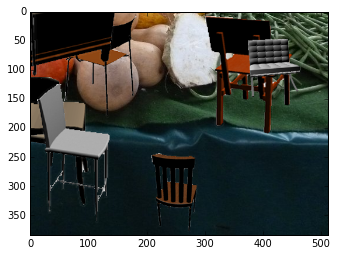

In [6]:
show_image(it0)

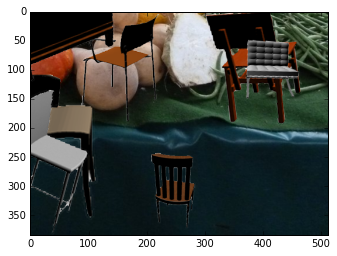

In [7]:
show_image(it1)

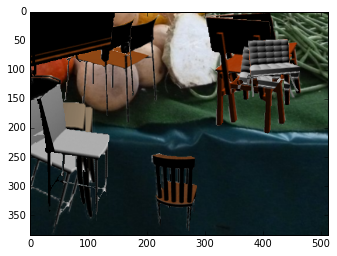

In [19]:
show_image(it0_expected)

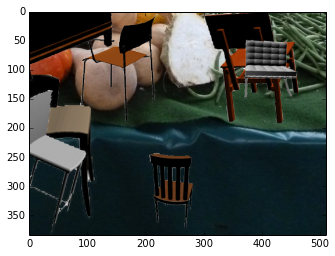

In [285]:
show_image(it1)

In [60]:
apply_flow_reverse_path("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-img0.ppm", 
               "/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-gt.flo", 
               "/home/gpu_user/corentin/images/expected-0000000-img1.ppm")

Reading 384 x 512 flow file in .flo format


In [58]:
image_end = open_image("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-img1.ppm")
flow = open_flow("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-gt.flo")
image_start_expected = apply_flow_reverse(image_end, flow)
image_start_actual = open_image("/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-img0.ppm")
optical_flow_lib.save_flow_image(flow, "/home/gpu_user/corentin/flownet2/data/FlyingChairs_examples/0000000-gt-flo.png")
loss1 = calculate_loss(image_start_expected, image_start_actual)
loss1

Reading 384 x 512 flow file in .flo format
max flow: 77.9450
flow range:
u = -75.656 .. 38.031
v = -28.719 .. 29.094


37205.50327572522

In [97]:
it1 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0312.jpg")
flow = open_flow("/home/gpu_user/corentin/images/lake_output/out-0.flo")
it0_exp = apply_flow_reverse(it1, flow)
it0 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0292.jpg")
cv2.imwrite("/home/gpu_user/corentin/images/lake_output/140106-0008-0292_expected.jpg", it0_exp)
optical_flow_lib.save_flow_image(flow, "/home/gpu_user/corentin/images/lake_output/out-0-flo.png")

Reading 480 x 704 flow file in .flo format


True

In [54]:
calculate_loss(image_end, image_start_actual)

27530.657002694286

# Flownet2-s

In [100]:
it0 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0292.jpg")
it1 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0312.jpg")
flow = open_flow("/home/gpu_user/corentin/Flownet2-s/0292.jpg.flo")
it0_exp = apply_flow_reverse(it1, flow)
cv2.imwrite("/home/gpu_user/corentin/Flownet2-s/140106-0008-0292_expected.jpg", it0_exp)
optical_flow_lib.save_flow_image(flow, "/home/gpu_user/corentin/Flownet2-s/0292.jpg.flo.png")

Reading 480 x 704 flow file in .flo format
max flow: 53.7769
flow range:
u = -10.934 .. 53.712
v = -6.336 .. 9.665


# Flownet2-SD

In [98]:
it0 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0292.jpg")
it1 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0312.jpg")
flow = open_flow("/home/gpu_user/corentin/Flownet2-SD/0292.jpg.flo")
it0_exp = apply_flow_reverse(it1, flow)
cv2.imwrite("/home/gpu_user/corentin/Flownet2-SD/140106-0008-0292_expected.jpg", it0_exp)
optical_flow_lib.save_flow_image(flow, "/home/gpu_user/corentin/Flownet2-SD/0292.jpg.flo.png")

Reading 480 x 704 flow file in .flo format
max flow: 27.7159
flow range:
u = -9.257 .. 27.333
v = -4.594 .. 2.606


# Flownet2-css

In [99]:
it0 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0292.jpg")
it1 = open_image("/home/gpu_user/corentin/lake-dataset/140106/0008/0312.jpg")
flow = open_flow("/home/gpu_user/corentin/Flownet2-css/0292.jpg.flo")
it0_exp = apply_flow_reverse(it1, flow)
cv2.imwrite("/home/gpu_user/corentin/Flownet2-css/140106-0008-0292_expected.jpg", it0_exp)
optical_flow_lib.save_flow_image(flow, "/home/gpu_user/corentin/Flownet2-css/0292.jpg.flo.png")

Reading 480 x 704 flow file in .flo format
max flow: 44.9564
flow range:
u = -8.956 .. 44.918
v = -6.001 .. 2.859


.

## Generate flow




In [323]:
h = it0.shape[0]
w = it0.shape[1]

it0_translate = translate_image(it0, 30, 30)
flow = generate_translation_flow(h, w, dx=30, dy=30)
it0_expected_before = apply_flow_reverse(it0_translate, flow)

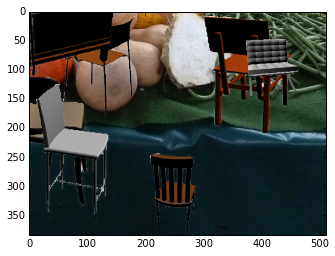

In [329]:
show_image(it0)

In [330]:
image1, image2, flow = generate_two_images_and_flow(it0, 20, 40)

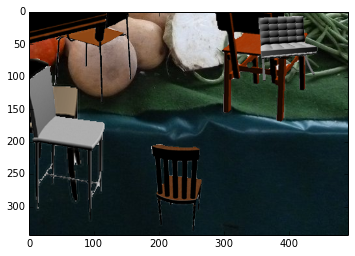

In [331]:
show_image(image1)

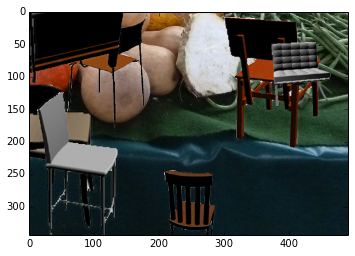

In [332]:
show_image(image2)

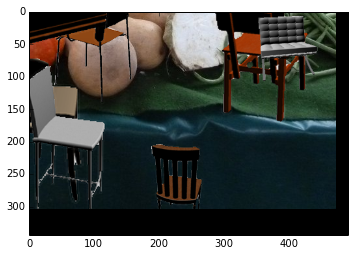

In [333]:
show_image(apply_flow_reverse(image2, flow))

### Generate the listing file and the training dataset

### Training set

In [15]:
input_dir  = '/home/gpu_user/corentin/lake-dataset/140606f/0024/'
output_dir  = '/home/gpu_user/corentin/training_set3/'
generate_dataset(input_dir, output_dir, n_images=500)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((680, 1016), -40) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((680, 1016), 40) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [16]:
make_lmdb(output_dir + "/list.txt", output_dir + "/data_lmdb")

executing command
/home/gpu_user/corentin/flownet2/build/tools/convert_imageset_and_flow.bin /home/gpu_user/corentin/training_set3//list.txt /home/gpu_user/corentin/training_set3//data_lmdb 0 lmdb



In [10]:
!ls /home/gpu_user/corentin/flownet2/build

cuda  examples	lib  matlab  python  src  test	tools


### Test set

In [11]:
input_dir  = '/home/gpu_user/corentin/lake-dataset/140606f/0025/'
output_dir = '/home/gpu_user/corentin/testing_set/'
generate_dataset(input_dir, output_dir, n_images=100)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((680, 1016), -40) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((680, 1016), 40) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [12]:
make_lmdb(output_dir + "list.txt", output_dir + "data_lmdb")

executing command
/home/gpu_user/corentin/flownet2/build/tools/convert_imageset_and_flow.bin /home/gpu_user/corentin/testing_set/list.txt /home/gpu_user/corentin/testing_set/data_lmdb 0 lmdb



AttributeError: 'NoneType' object has no attribute 'readline'

In [18]:
    img = open_image('/home/gpu_user/corentin/lake-dataset/140606f/0024/0829.jpg')

(480, 704, 3)


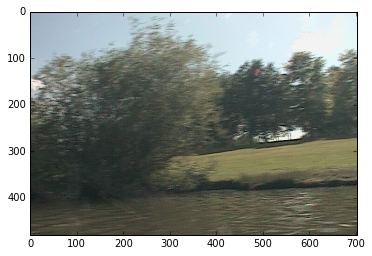

In [22]:
show_image(img)
print(img.shape)

In [23]:
img1, img2, flow = generate_two_images_and_flow(img, dx=50, dy=-50)

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((430, 654), 50) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full((430, 654), -50) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


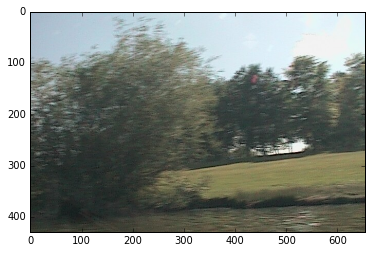

In [24]:
show_image(img1)

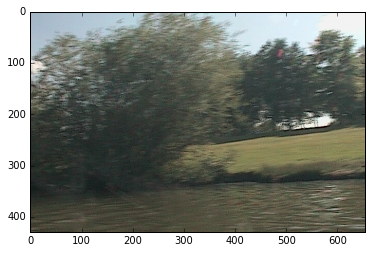

In [25]:
show_image(img2)

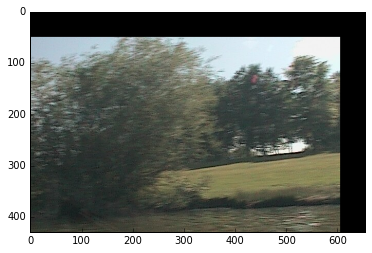

In [52]:
expected_img1 = apply_flow_reverse(img2, flow)
show_image(expected_img1)

In [40]:
def crop(img, up=0, down=0, left=0, right=0):
    x, y, _ = img.shape
    return img[up:x-down, left:y-right]

In [55]:
assert(cv2.norm(crop(expected_img1, 50, 0, 0, 50), 
                crop(img1         , 50, 0, 0, 50)) == 0)

In [30]:
def plot_log_file(path, lim=None):
    f = open(path, 'r')
    logs = []
    for line in f:                                        
        logs.append([float(x) for x in line.strip().split(',')])
    logs = np.array(logs)
    it = logs[:lim, 0]
    plt.plot(it, logs[:lim,1], label="train error")    
    plt.plot(it, logs[:lim,2], label="test error")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.legend(loc="best")

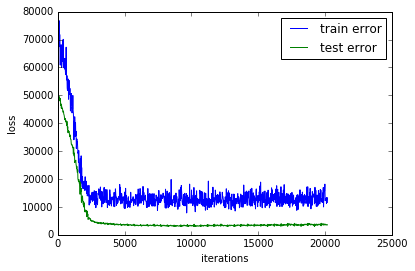

In [31]:
plot_log_file('/home/gpu_user/corentin/flownet2/models/FlowNet2-s/train-logs_solver-2017-10-04-13:51:15')

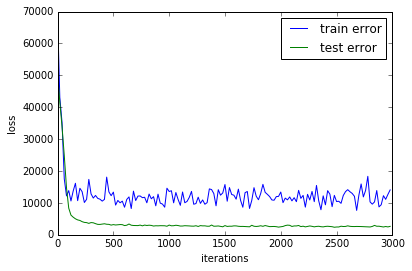

In [34]:
plot_log_file('/home/gpu_user/corentin/flownet2/models/FlowNet2-s/full-train-logs_solver-2017-10-04-17:50:17', lim=150)

In [ ]:
run_model(deploy_model, weights,            
          img0_p, img1_p, flow_p)

### TEST MODEL FINETUNED ON 200,000 ITERATIONS

In [1]:
import sys
sys.path.append("OpticalFlowToolkit/")
import lib.flowlib as optical_flow_lib
import numpy as np
import matplotlib.pyplot as plt
import time

%run tools

In [2]:
#%run run_model.py

In [2]:
import cv2


In [4]:
cv2.__version__

'3.2.0'

In [3]:
deploy_model = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/FlowNet2-s_deploy.prototxt.template"
weights = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/coco-weights-3.caffemodel"
weights_original = "/home/gpu_user/corentin/flownet2/models/FlowNet2-s/coco-FlowNet2-s_weights.caffemodel"
img0_p = "/home/gpu_user/corentin/lake-dataset/140606f/0036/0390.jpg"
img1_p = "/home/gpu_user/corentin/lake-dataset/140606f/0036/0391.jpg"
flow_p = "/home/gpu_user/corentin/FlowNet2-s/model3/140606f-0036-0390-0391-out.flo"
prefix = "/home/gpu_user/corentin/FlowNet2-s/model3/140606f-0036-0390-0391"
prefix_original = "/home/gpu_user/corentin/FlowNet2-s/model-original/140606f-0036-0390-0391"

In [ ]:
test_model_on_image_pair(deploy_model, weights, img0_p, img1_p, prefix)

ok writing expected image
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/coco-weights-3.caffemodel.
Succeeded.
Reading 480 x 704 flow file in .flo format
copied flow
ok ran
ok open
ok apply flows
ok imwrite
max flow: 13.1662
flow range:
u = -13.132 .. 5.489
v = -4.610 .. 5.000


In [ ]:
apply_flow_reverse_path(img1_p, prefix + "-out.flo", prefix + "img0-expected.jpg")

In [3]:
test_model_on_image_pair(deploy_model, weights_original, img0_p, img1_p, prefix_original)

ok writing expected image
Network forward pass using /home/gpu_user/corentin/flownet2/models/FlowNet2-s/coco-FlowNet2-s_weights.caffemodel.
Succeeded.
Reading 480 x 704 flow file in .flo format
copied flow
ok ran
ok open
ok apply flows
ok imwrite
max flow: 6.5476
flow range:
u = -0.483 .. 6.547
v = -1.733 .. 1.387
ok optical save
/home/gpu_user/corentin/lake-dataset/140606f/0036/0391.jpg
/home/gpu_user/corentin/FlowNet2-s/model-original/140606f-0036-0390-0391-out.flo


In [4]:
apply_flow_reverse_path(img1_p, prefix_original + "-out.flo", prefix_original + "img0-expected.jpg")

Reading 480 x 704 flow file in .flo format
    h, w = flow.shape[:2]
(480, 704, 2)
(480, 704, 3)
pre remap
(480, 704)
(480, 704)
(480, 704, 3)
remap done


In [ ]:
img = open_flow("/home/gpu_user/corentin/FlowNet2-s/model3/140606f-0036-0390-0391-out.flo")

In [ ]:
run_model(deploy_model, weights, img0_p, img1_p, flow_p)
it1 = open_image(img1_p)
flow = open_flow(flow_p)
it0_exp = apply_flow_reverse(it1, flow)
it0 = open_image(img0_p)
cv2.imwrite("/home/gpu_user/corentin/FlowNet2-s/model3/140606f-0036-0390-0391-expected.jpg", it0_exp)
optical_flow_lib.save_flow_image(flow, "/home/gpu_user/corentin/FlowNet2-s/model3/140606f-0036-0390-0391-flo.png")

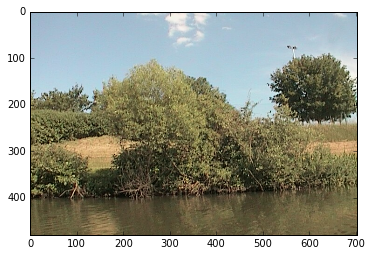

In [6]:
show_image(img)

Reading 480 x 704 flow file in .flo format
